### Import all the necessary libraries for our sentiment analysis project. 
- `nltk` for natural language processing tools and the VADER sentiment analyzer.
- `string` for string operations, particularly to help remove punctuation.
- `requests` for making HTTP requests to retrieve web pages.
- `TextBlob` for an alternative sentiment analysis method (not used with VADER).
- `BeautifulSoup` from `bs4` for parsing HTML and extracting data from web pages.
- `matplotlib.pyplot` for creating visualizations of our data.
- `stopwords` and `word_tokenize` from `nltk` to preprocess the text by removing common words and tokenizing sentences.
- `SentimentIntensityAnalyzer` from `nltk.sentiment` to perform sentiment analysis using VADER.


In [9]:
import nltk
import string
import requests
from textblob import TextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer



### Web Scraping

This cell defines a function `fetch_reviews` that scrapes customer reviews from a specified URL. The function takes a base URL as input and continuously fetches reviews across multiple pages until there are no more reviews to collect. The reviews are extracted from HTML using BeautifulSoup and stored in a list. Additionally, we include diagnostic print statements to monitor the progress of scraping across different pages.

The function is then called with the base URL of the airline reviews site, and the reviews are collected into `reviews_data`. We print the total number of reviews scraped and display a few sample reviews to verify our scraping process.


In [2]:
def fetch_reviews(base_url):
    """Fetch reviews from the given URL and return a list of reviews.
    
    Args:
    base_url (str): The URL of the website to scrape reviews from.
    
    Returns:
    list: A list of reviews scraped from the website.
    """
    page = 1
    reviews = []

    while True:
        url = f"{base_url}page/{page}/"  # Adjust if the pagination URL differs
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Check if the current page has reviews
        current_page_reviews = soup.findAll('article', {'itemprop': 'review'})
        if not current_page_reviews:
            break  # If no reviews are found, stop the loop

        for review in current_page_reviews:
            review_text = review.find('div', {'class': 'text_content'}).text.strip()
            reviews.append(review_text)
        
        print(f"Scraped page {page} with {len(current_page_reviews)} reviews.")
        page += 1  # Move to the next page

    return reviews

# Base URL of the website (you might need to adjust pagination handling)
base_url = 'https://www.airlinequality.com/airline-reviews/condor-airlines/'
reviews_data = fetch_reviews(base_url)

print(f"Total reviews scraped: {len(reviews_data)}")
print("Sample reviews:")
for review in reviews_data[:5]:
    print(review)
    print("-------")

Scraped page 1 with 10 reviews.
Scraped page 2 with 10 reviews.
Scraped page 3 with 10 reviews.
Scraped page 4 with 10 reviews.
Scraped page 5 with 10 reviews.
Scraped page 6 with 10 reviews.
Scraped page 7 with 10 reviews.
Scraped page 8 with 10 reviews.
Scraped page 9 with 10 reviews.
Scraped page 10 with 10 reviews.
Scraped page 11 with 10 reviews.
Scraped page 12 with 10 reviews.
Scraped page 13 with 10 reviews.
Scraped page 14 with 10 reviews.
Scraped page 15 with 10 reviews.
Scraped page 16 with 10 reviews.
Scraped page 17 with 10 reviews.
Scraped page 18 with 10 reviews.
Scraped page 19 with 10 reviews.
Scraped page 20 with 10 reviews.
Scraped page 21 with 10 reviews.
Scraped page 22 with 10 reviews.
Scraped page 23 with 10 reviews.
Scraped page 24 with 10 reviews.
Scraped page 25 with 10 reviews.
Scraped page 26 with 10 reviews.
Scraped page 27 with 10 reviews.
Scraped page 28 with 10 reviews.
Scraped page 29 with 10 reviews.
Scraped page 30 with 10 reviews.
Scraped page 31 wit

### Data Preprocessing

This cell prepares for and performs text cleaning to enhance the quality of sentiment analysis. Firstly, we download necessary NLTK resources, specifically the 'punkt' tokenizer and the 'stopwords' list for English. These resources aid in tokenizing the text into words and filtering out common, less informative words respectively.

We then define the `clean_text` function that processes the input text by:
1. Removing all non-alphabetic characters, which helps in focusing on actual words.
2. Converting all text to lowercase to ensure uniformity, thereby avoiding duplicates such as "The" and "the".
3. Removing punctuation, which is typically irrelevant to sentiment analysis.
4. Tokenizing the text into individual words and removing stopwords to eliminate common words that do not contribute much meaning to the sentiment.

The function is applied to each review in the dataset to produce `cleaned_data`, which contains the processed versions of the original reviews. The content of `cleaned_data` is displayed at the end of the cell to review the output of text cleaning.


In [3]:
# download the necessary resources
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean the text by removing non-alphabetic characters and stopwords.

    Args:
    text (str): The text to clean.

    Returns:
    str: The cleaned text.
    """
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

cleaned_data = [clean_text(review) for review in reviews_data]
cleaned_data

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lalithsagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lalithsagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['trip verified blanket earphones looks like ran fact saw distributed couple rows front cold use scarf instead food poor bad quality thankfully offer lot beverages longdistance flight acceptable even economy class space seat narrow given tickets price would expected better services offered',
 'trip verified flight frankfurt prague canceled condor reason time gate unable board second plane cabin pay wine headphones etc portions food comparison airlines terrible hungry seats uncomfortable comparison airlines planes cleaned choosing airlines ever',
 'trip verified declined checkin daughters passport expiring less days return date fair agreed get return flight rebooked soon paid extra ticket changed told cutoff time check passed wont make flight rebooked online counter agent refused help upon calling condor helpdesk told flight cant rebook end paying ticket wasnt able use also tricked paying change didnt let use ticket',
 'trip verified never book airline minutes checking suitcase told fli

### Sentiment scores

#### Using TextBlob

This cell utilizes the TextBlob library to perform sentiment analysis on the cleaned reviews. TextBlob provides a simple API to access its powerful NLP tools, which can be used to calculate the sentiment of text. The sentiment function returns a polarity score that ranges from -1 to 1, where -1 indicates negative sentiment, 1 indicates positive sentiment, and values around 0 indicate neutral sentiment.

Here’s how we process the sentiments:
1. We iterate over each review in `cleaned_data`.
2. For each review, a `TextBlob` object is created and its sentiment polarity is calculated.
3. The polarity scores are stored in the `sentiments_textblob` list.

To demonstrate the output, we print the first five reviews along with their corresponding sentiment scores. Each print statement includes the review text and its sentiment polarity, visually separated by lines for clarity.


In [20]:
sentiments_textblob = []
for review in cleaned_data:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # Polarity score
    sentiments_textblob.append(sentiment)

# Example: Print sentiments of the first two reviews
for review in cleaned_data[:5]:
    print("Review:", review)
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # Polarity score
    print("Sentiment:", sentiment)
    print("-------")

Review: trip verified blanket earphones looks like ran fact saw distributed couple rows front cold use scarf instead food poor bad quality thankfully offer lot beverages longdistance flight acceptable even economy class space seat narrow given tickets price would expected better services offered
Sentiment: -0.24999999999999997
-------
Review: trip verified flight frankfurt prague canceled condor reason time gate unable board second plane cabin pay wine headphones etc portions food comparison airlines terrible hungry seats uncomfortable comparison airlines planes cleaned choosing airlines ever
Sentiment: -0.5
-------
Review: trip verified declined checkin daughters passport expiring less days return date fair agreed get return flight rebooked soon paid extra ticket changed told cutoff time check passed wont make flight rebooked online counter agent refused help upon calling condor helpdesk told flight cant rebook end paying ticket wasnt able use also tricked paying change didnt let use 

#### Using VADER

This cell employs the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to evaluate the sentiments expressed in the cleaned reviews. VADER is particularly well-suited for texts from social media with informal language, including slang and emojis.

The steps are as follows:
1. We iterate over each review in `cleaned_data`.
2. For each review, the VADER sentiment analyzer `sia` computes the sentiment scores.
3. The `compound` score, which is a normalized score that ranges from -1 (most negative) to 1 (most positive), is extracted and stored in `sentiments_vader`.

To illustrate how VADER interprets each review, we print reviews from the 6th to the 10th along with their `compound` sentiment scores. This helps in visually understanding the effectiveness and response of VADER to different kinds of review texts.


In [10]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lalithsagar/nltk_data...


In [22]:
sentiments_vader = []
for review in cleaned_data:
    score = sia.polarity_scores(review)
    sentiments_vader.append(score['compound'])  # 'compound' gives the normalized sentiment score

# Example: Print sentiments of the first two reviews
# Example: Print sentiments of the first two reviews
for review in cleaned_data[5:10]:
    print("Review:", review)
    print("Sentiment:", sentiment)
    score = sia.polarity_scores(review)
    print("VADER Sentiment:", score['compound'])



Review: trip verified almost four months since trip airlines mishandling resulted monthlong search lost luggage three visits airport without assistance located lufthansa airlines lost found unfortunately luggage contents damaged beyond use despite reaching various departments via email received response
Sentiment: -0.016666666666666666
VADER Sentiment: -0.8588
Review: verified terrible experience hours delay overbooked flight offered upgrade cash made downgrade business economy pet board offered upgrade cash regardless flight delayed hours luggage issues etc overbooked economy blankets refreshments water pay everything check staff beyond rude
Sentiment: -0.016666666666666666
VADER Sentiment: -0.8658
Review: trip verified great airline staff professional passionate enthusiastic thoroughly love jobs showed seat comfort good amenities thoughtful good quality cuisine remarkably decent aircraft new clean comfortable amazing surprise airline really hits ballpark
Sentiment: -0.016666666666666

### Sentiment Analysis

This cell categorizes the sentiment scores obtained from TextBlob into negative, neutral, and positive based on predefined thresholds, and then visualizes these categories in a histogram. This visualization helps in understanding the overall sentiment distribution across all reviews.

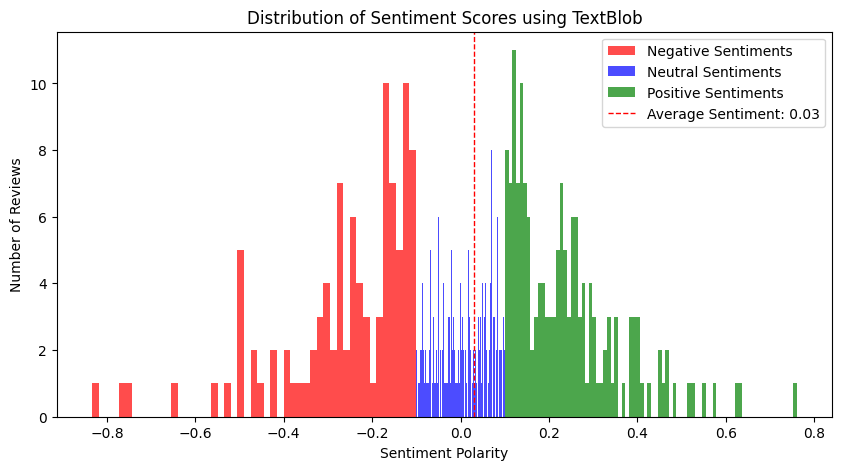

In [12]:
# Define thresholds
negative_threshold = -0.1
positive_threshold = 0.1

# Categorize sentiments
negative_sentiments = [s for s in sentiments_textblob if s < negative_threshold]
neutral_sentiments = [s for s in sentiments_textblob if negative_threshold <= s <= positive_threshold]
positive_sentiments = [s for s in sentiments_textblob if s > positive_threshold]

# Create a histogram
plt.figure(figsize=(10, 5))

# Plotting
plt.hist(negative_sentiments, bins=int(len(negative_sentiments)/2), color='red', alpha=0.7, label='Negative Sentiments')
plt.hist(neutral_sentiments, bins=max(int(len(neutral_sentiments)/2), 1), color='blue', alpha=0.7, label='Neutral Sentiments')
plt.hist(positive_sentiments, bins=int(len(positive_sentiments)/2), color='green', alpha=0.7, label='Positive Sentiments')

# Adding labels and title
plt.title('Distribution of Sentiment Scores using TextBlob')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.axvline(x=sum(sentiments_textblob)/len(sentiments_textblob), color='r', linestyle='dashed', linewidth=1, label=f'Average Sentiment: {sum(sentiments_textblob)/len(sentiments_textblob):.2f}')
plt.legend()
plt.show()


This cell categorizes the sentiment scores obtained from VADER into negative, neutral, and positive based on predefined thresholds, and then visualizes these categories in a histogram. This visualization helps in understanding the overall sentiment distribution across all reviews.

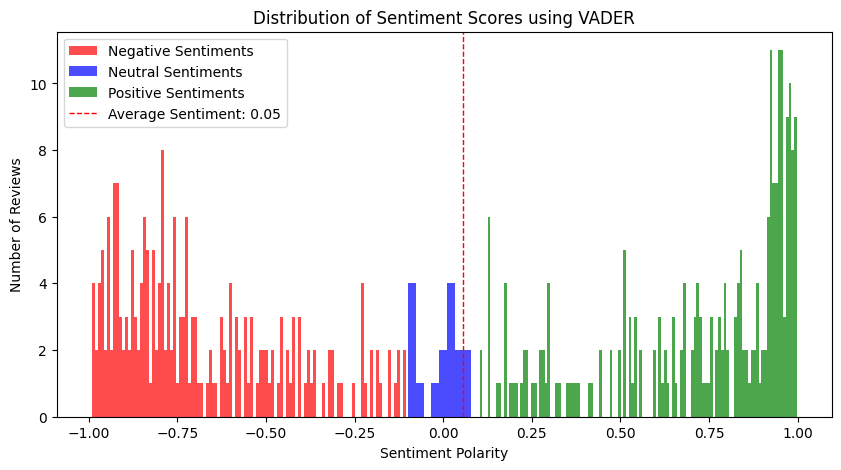

In [14]:
# Define thresholds
negative_threshold = -0.1
positive_threshold = 0.1

# Categorize sentiments
negative_sentiments = [s for s in sentiments_vader if s < negative_threshold]
neutral_sentiments = [s for s in sentiments_vader if negative_threshold <= s <= positive_threshold]
positive_sentiments = [s for s in sentiments_vader if s > positive_threshold]

# Create a histogram
plt.figure(figsize=(10, 5))

# Plotting
plt.hist(negative_sentiments, bins=int(len(negative_sentiments)/2), color='red', alpha=0.7, label='Negative Sentiments')
plt.hist(neutral_sentiments, bins=max(int(len(neutral_sentiments)/2), 1), color='blue', alpha=0.7, label='Neutral Sentiments')
plt.hist(positive_sentiments, bins=int(len(positive_sentiments)/2), color='green', alpha=0.7, label='Positive Sentiments')

# Adding labels and title
plt.title('Distribution of Sentiment Scores using VADER')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.axvline(x=sum(sentiments_vader)/len(sentiments_vader), color='r', linestyle='dashed', linewidth=1, label=f'Average Sentiment: {sum(sentiments_vader)/len(sentiments_vader):.2f}')
plt.legend()
plt.show()
